# Normal Distribution

Normal Distribution, also known as Gaussian distribution is one of the most widely assumed distribution in Data Science. A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation.

The probability distribution function of a normal density curve with mean $\mu$ and standard deviation $\sigma$ at a given point $\mathrm{x}$ is given by:

$$
f\left(x \mid \mu, \sigma^{2}\right)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{\frac{-(x-\mu)^{2}}{2 \sigma^{2}}}
$$

## 1.1 Load Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['lines.linewidth'] = 0.7


C:\Users\HarrisonK\AppData\Local\Temp\ipykernel_36908\3685420471.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



## 1.2 Load GBPUSD Data

In [34]:
# Load csv file
df = pd.read_csv('data/gbpusd.csv', index_col=0, parse_dates=True, dayfirst=True)['2011':'2023']
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0


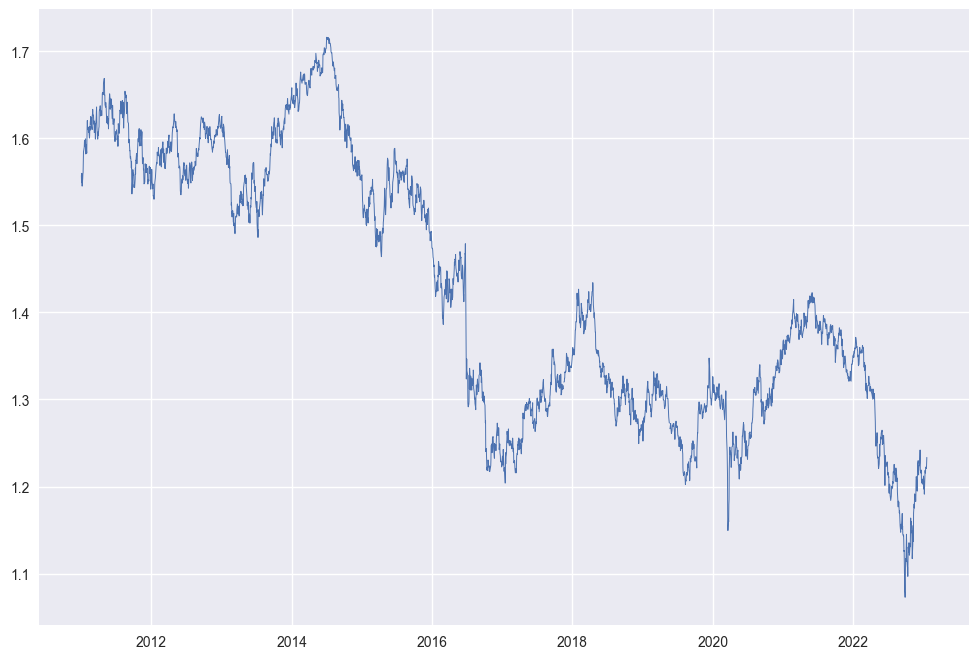

In [35]:
plt.plot(df['Close'])

In [36]:
# Verify the datetime format
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='Date', length=3144, freq=None)

In [37]:
# Get the last 300 index values
df.index[-300:]

DatetimeIndex(['2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

## 1.3 Calculate return

In [38]:
# calculate returns and add it to the exisiting Dataframe as a column
df['Return'] = df['Adj Close'].pct_change().fillna(0)

# Get the first 5 rows
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940


## 1.4 Calculate mean and sigma

In [39]:
# Calculate the mean and standard deviation of the returns
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])

print('Mean: ', mu)
print('Standard Deviation: ', sigma)

Mean:  -5.8101830257450726e-05
Standard Deviation:  0.005655464234175409


## 1.5 Calculate Scaled Returns

In [40]:
# Calculate the scaled returns
df['Scaled Return'] = (df['Return'] - mu) / sigma

df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled Return
Date,,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000,0.010274
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313,-0.929099
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988,1.245869
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507,-0.963499
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940,-0.686313


## 1.6 Calculate Bin Range

In [41]:
# Calculate the minimum and maximum bin range
sr_min = df['Scaled Return'].min()
sr_max = df['Scaled Return'].max()

print('Minimum Scaled Return: ', sr_min)
print('Maximum Scaled Return: ', sr_max)

Minimum Scaled Return:  -13.434929545274667
Maximum Scaled Return:  5.451295057860454


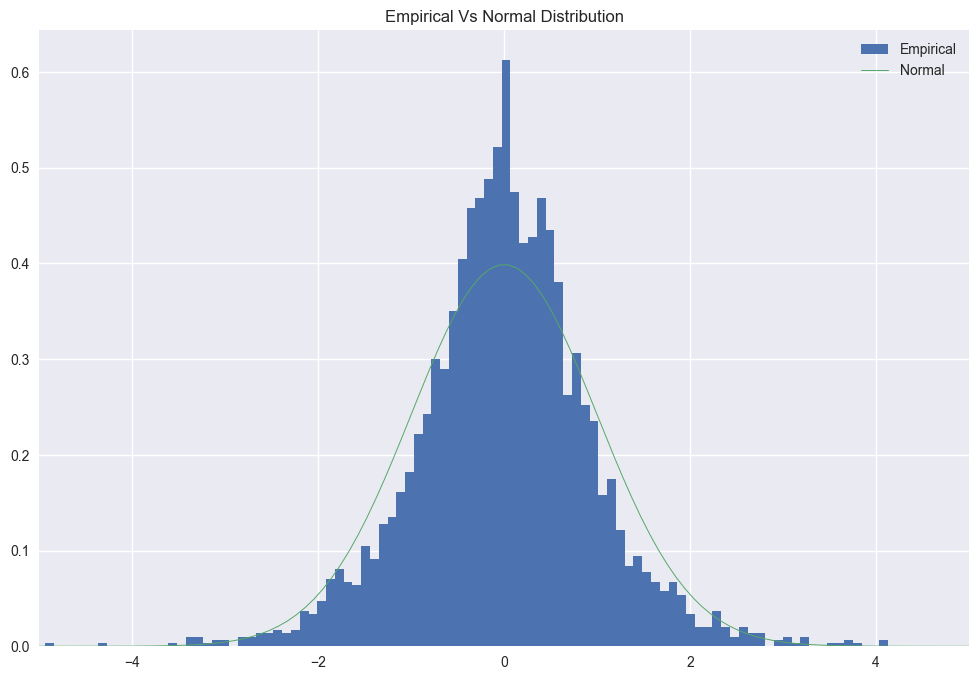

In [43]:
# Define bins - x
x = np.linspace(sr_min, sr_max, 200)

# Calculate normal probability density function - y
y = (1 / np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

# Plot histogram of scaled returns
plt.hist(df['Scaled Return'], bins=200, density=True, label='Empirical')

# Limit the x-axis
plt.xlim(-5, 5)

plt.title('Empirical Vs Normal Distribution')

# Plot norm pdf
plt.plot(x, y, label='Normal')
plt.legend()
plt.show()